In [2]:
# Create train and test data and flatten it
from cifar10helper import load_cifar10


# Load binary classification data (airplane vs rest)
x_train_binary, y_train_binary, x_test_binary, y_test_binary = load_cifar10(binary=True, target_class=0)

# Load categorical classification data
x_train_categorical, y_train_categorical, x_test_categorical, y_test_categorical = load_cifar10(binary=False)
y_train_categorical = y_train_categorical.astype(int)  # Ensure labels are integers
y_test_categorical = y_test_categorical.astype(int)


In [17]:
# Import neural network and plotting
from neuralnetwork import (NeuralNetwork, DenseLayer,
                           BinaryClassification,
                           CategoricalClassification,
                           Sigmoid, Softmax, ReLU)
from plot import plot_confusion_matrix_and_f1, plot_history
import cupy as cp

## Task 1: Logistic Regression for binary classification

In [4]:
# Create model (single layer with sigmoid activation)
model = NeuralNetwork([
    # 3072 input features, 1 output
    DenseLayer(3072, 1, activation=Sigmoid)
])


In [5]:
# Train model
print("Training logistic regression model...")
history = model.train(x_train_binary, y_train_binary, x_test_binary, y_test_binary,
                      classification_task=BinaryClassification,
                      epochs=20, learning_rate=0.01, )


Training logistic regression model...
Epoch 1/20 | Loss: 0.5360 | Acc: 94.7967 | Val Loss: 0.4922 | Val Acc: 0.7622
Epoch 2/20 | Loss: 0.4809 | Acc: 99.7099 | Val Loss: 0.4693 | Val Acc: 0.7861
Epoch 3/20 | Loss: 0.4636 | Acc: 102.3399 | Val Loss: 0.4556 | Val Acc: 0.8025
Epoch 4/20 | Loss: 0.4516 | Acc: 104.2001 | Val Loss: 0.4451 | Val Acc: 0.8155
Epoch 5/20 | Loss: 0.4421 | Acc: 105.6776 | Val Loss: 0.4366 | Val Acc: 0.8267
Epoch 6/20 | Loss: 0.4341 | Acc: 106.7448 | Val Loss: 0.4292 | Val Acc: 0.8346
Epoch 7/20 | Loss: 0.4269 | Acc: 107.6579 | Val Loss: 0.4224 | Val Acc: 0.8407
Epoch 8/20 | Loss: 0.4203 | Acc: 108.3541 | Val Loss: 0.4161 | Val Acc: 0.8458
Epoch 9/20 | Loss: 0.4140 | Acc: 108.9427 | Val Loss: 0.4101 | Val Acc: 0.8501
Epoch 10/20 | Loss: 0.4080 | Acc: 109.4922 | Val Loss: 0.4043 | Val Acc: 0.8531
Epoch 11/20 | Loss: 0.4022 | Acc: 109.8725 | Val Loss: 0.3987 | Val Acc: 0.8554
Epoch 12/20 | Loss: 0.3966 | Acc: 110.1576 | Val Loss: 0.3933 | Val Acc: 0.8576
Epoch 13/20 |

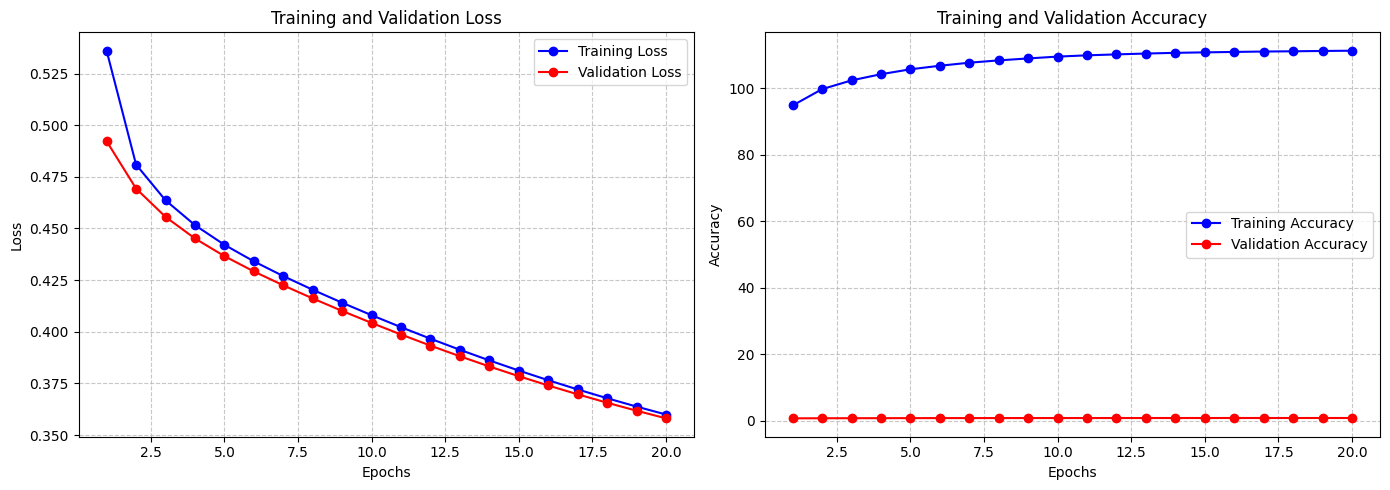

Classification Report:
              precision    recall  f1-score   support

    Airplane     0.6546    0.2710    0.3833      1000
Not Airplane     0.9240    0.9841    0.9531      9000

    accuracy                         0.9128     10000
   macro avg     0.7893    0.6276    0.6682     10000
weighted avg     0.8970    0.9128    0.8961     10000



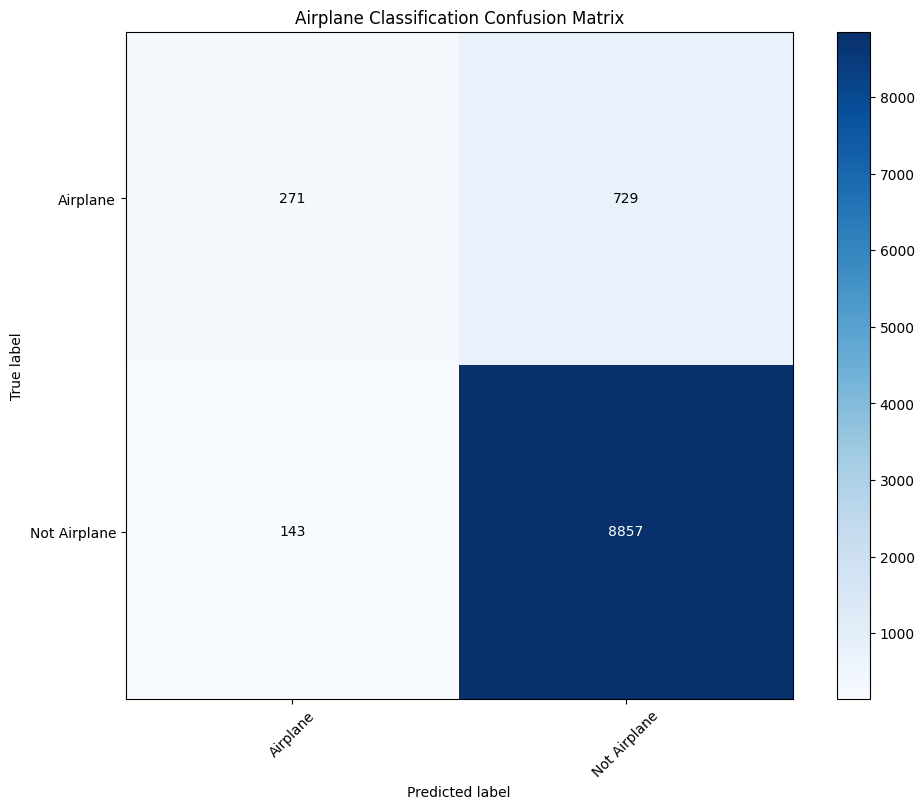

In [7]:
# Plot training history
plot_history(history)

# Evaluate
y_prediction_categorical = (model.forward(x_test_binary) > 0.5).astype(int)

# Plot confusion matrix and F1 scores
plot_confusion_matrix_and_f1(y_test_binary, y_prediction_categorical,
                             classes=['Airplane', 'Not Airplane'],
                             title='Airplane Classification Confusion Matrix')


## Task 2: Binary Classification Network with Hidden Layer


In [9]:
# Create model with one hidden layer
model = NeuralNetwork([
    DenseLayer(3072, 64, activation=Sigmoid),  # Hidden layer with 64 neurons
    DenseLayer(64, 1, activation=Sigmoid)      # Output layer
])


In [10]:
# Train model
print("Training network with hidden layer...")
history = model.train(x_train_b, y_train_binary, x_test_binary, y_test_binary,
                      epochs=30, learning_rate=0.05,
                      classification_task=BinaryClassification,
                      )


Training network with hidden layer...
Epoch 1/30 | Loss: 0.3887 | Acc: 114.9690 | Val Loss: 0.3361 | Val Acc: 0.9000
Epoch 2/30 | Loss: 0.3270 | Acc: 115.1280 | Val Loss: 0.3254 | Val Acc: 0.9000
Epoch 3/30 | Loss: 0.3172 | Acc: 115.1280 | Val Loss: 0.3171 | Val Acc: 0.9000
Epoch 4/30 | Loss: 0.3097 | Acc: 115.1280 | Val Loss: 0.3108 | Val Acc: 0.9000
Epoch 5/30 | Loss: 0.3042 | Acc: 115.1280 | Val Loss: 0.3061 | Val Acc: 0.9000
Epoch 6/30 | Loss: 0.3001 | Acc: 115.1280 | Val Loss: 0.3024 | Val Acc: 0.9000
Epoch 7/30 | Loss: 0.2967 | Acc: 115.1280 | Val Loss: 0.2991 | Val Acc: 0.9000
Epoch 8/30 | Loss: 0.2936 | Acc: 115.1244 | Val Loss: 0.2960 | Val Acc: 0.8999
Epoch 9/30 | Loss: 0.2906 | Acc: 115.1202 | Val Loss: 0.2928 | Val Acc: 0.8996
Epoch 10/30 | Loss: 0.2874 | Acc: 115.0682 | Val Loss: 0.2894 | Val Acc: 0.8986
Epoch 11/30 | Loss: 0.2840 | Acc: 114.9062 | Val Loss: 0.2858 | Val Acc: 0.8975
Epoch 12/30 | Loss: 0.2804 | Acc: 114.7333 | Val Loss: 0.2821 | Val Acc: 0.8963
Epoch 13/30

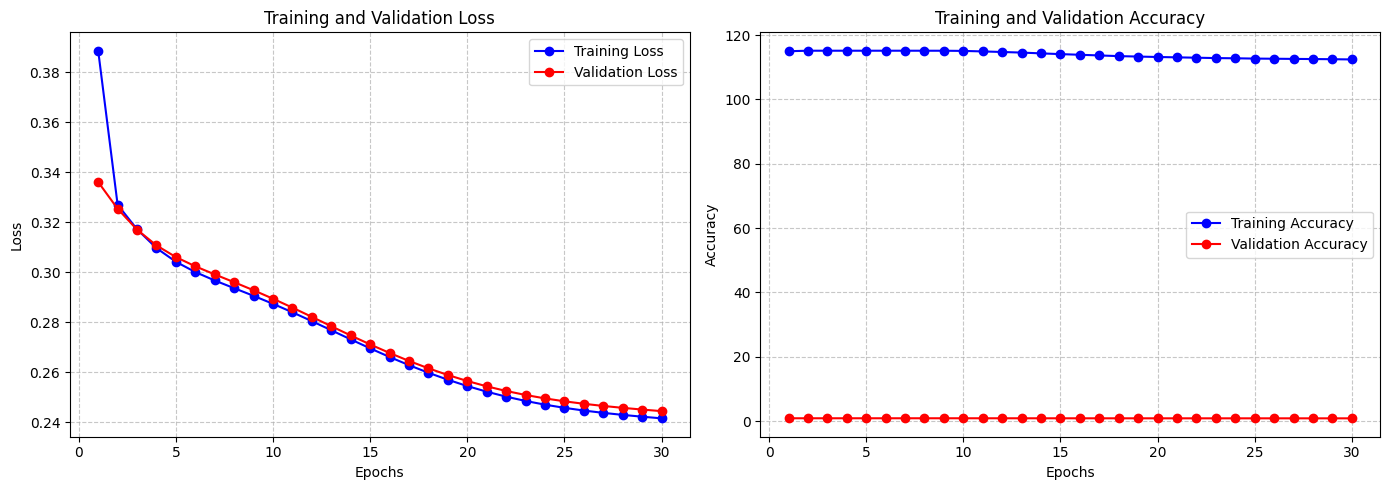

Classification Report:
              precision    recall  f1-score   support

    Airplane     0.6747    0.1950    0.3026      1000
Not Airplane     0.9171    0.9896    0.9520      9000

    accuracy                         0.9101     10000
   macro avg     0.7959    0.5923    0.6273     10000
weighted avg     0.8929    0.9101    0.8870     10000



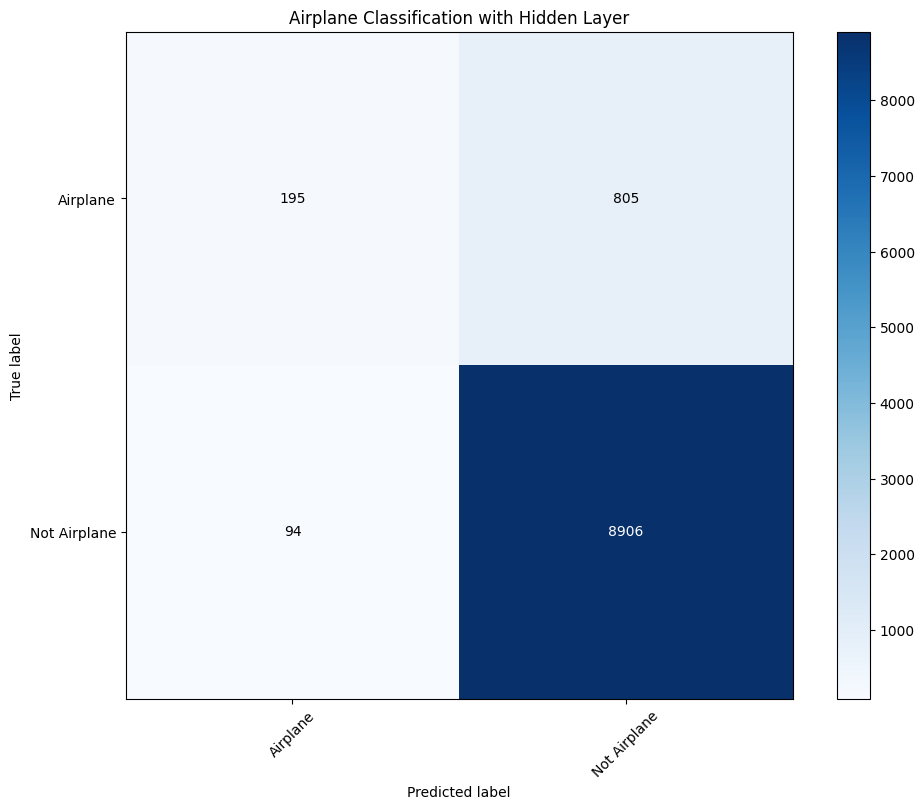

In [11]:
# Plot training history
plot_history(history)

y_prediction_categorical = (model.forward(x_test_binary) > 0.5).astype(int)

# Plot confusion matrix and F1 scores
plot_confusion_matrix_and_f1(y_test_binary, y_prediction_categorical,
                             classes=['Airplane', 'Not Airplane'],
                             title='Airplane Classification with Hidden Layer')


## Task 3: Multiclass Classification

In [13]:
# Create model with Sigmoid hidden layer and softmax output
model = NeuralNetwork([
    DenseLayer(3072, 128, activation=ReLU),  # Hidden layer with ReLU
    DenseLayer(128, 10, activation=Softmax)  # 10-class output with softmax
])


In [19]:
history = model.train(x_train_categorical, y_train_categorical, x_test_categorical, y_test_categorical,
                         epochs=50, learning_rate=0.01, classification_task=CategoricalClassification)

Epoch 1/50 | Loss: 2.1597 | Acc: 0.2344 | Val Loss: 2.0093 | Val Acc: 0.2835
Epoch 2/50 | Loss: 1.9274 | Acc: 0.3140 | Val Loss: 1.8529 | Val Acc: 0.3395
Epoch 3/50 | Loss: 1.8141 | Acc: 0.3586 | Val Loss: 1.7686 | Val Acc: 0.3740
Epoch 4/50 | Loss: 1.7426 | Acc: 0.3845 | Val Loss: 1.7064 | Val Acc: 0.3968
Epoch 5/50 | Loss: 1.6897 | Acc: 0.4046 | Val Loss: 1.6609 | Val Acc: 0.4119
Epoch 6/50 | Loss: 1.6487 | Acc: 0.4194 | Val Loss: 1.6259 | Val Acc: 0.4293
Epoch 7/50 | Loss: 1.6149 | Acc: 0.4332 | Val Loss: 1.5976 | Val Acc: 0.4410
Epoch 8/50 | Loss: 1.5861 | Acc: 0.4426 | Val Loss: 1.5740 | Val Acc: 0.4484
Epoch 9/50 | Loss: 1.5610 | Acc: 0.4524 | Val Loss: 1.5536 | Val Acc: 0.4550
Epoch 10/50 | Loss: 1.5384 | Acc: 0.4610 | Val Loss: 1.5360 | Val Acc: 0.4612
Epoch 11/50 | Loss: 1.5179 | Acc: 0.4680 | Val Loss: 1.5201 | Val Acc: 0.4688
Epoch 12/50 | Loss: 1.4988 | Acc: 0.4763 | Val Loss: 1.5056 | Val Acc: 0.4722
Epoch 13/50 | Loss: 1.4808 | Acc: 0.4836 | Val Loss: 1.4923 | Val Acc: 0.

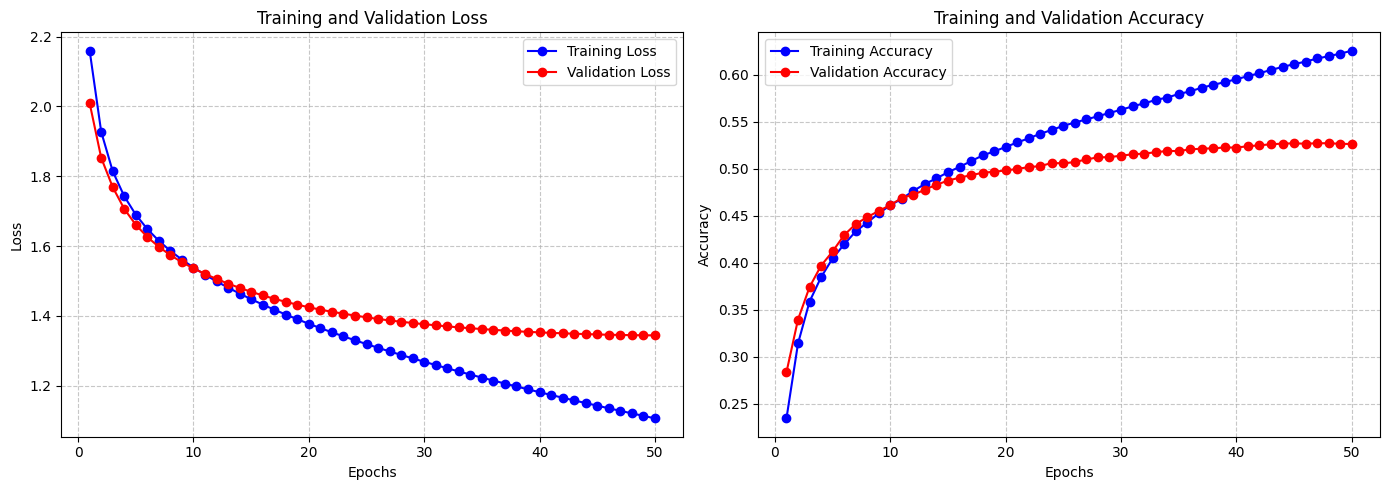

Classification Report:
              precision    recall  f1-score   support

    airplane     0.6192    0.6000    0.6094      1000
  automobile     0.6417    0.6250    0.6332      1000
        bird     0.4659    0.3690    0.4118      1000
         cat     0.3438    0.3630    0.3531      1000
        deer     0.4535    0.3900    0.4194      1000
         dog     0.4206    0.4050    0.4126      1000
        frog     0.5324    0.6410    0.5817      1000
       horse     0.5615    0.6070    0.5834      1000
        ship     0.6304    0.6670    0.6482      1000
       truck     0.5705    0.5950    0.5825      1000

    accuracy                         0.5262     10000
   macro avg     0.5239    0.5262    0.5235     10000
weighted avg     0.5239    0.5262    0.5235     10000



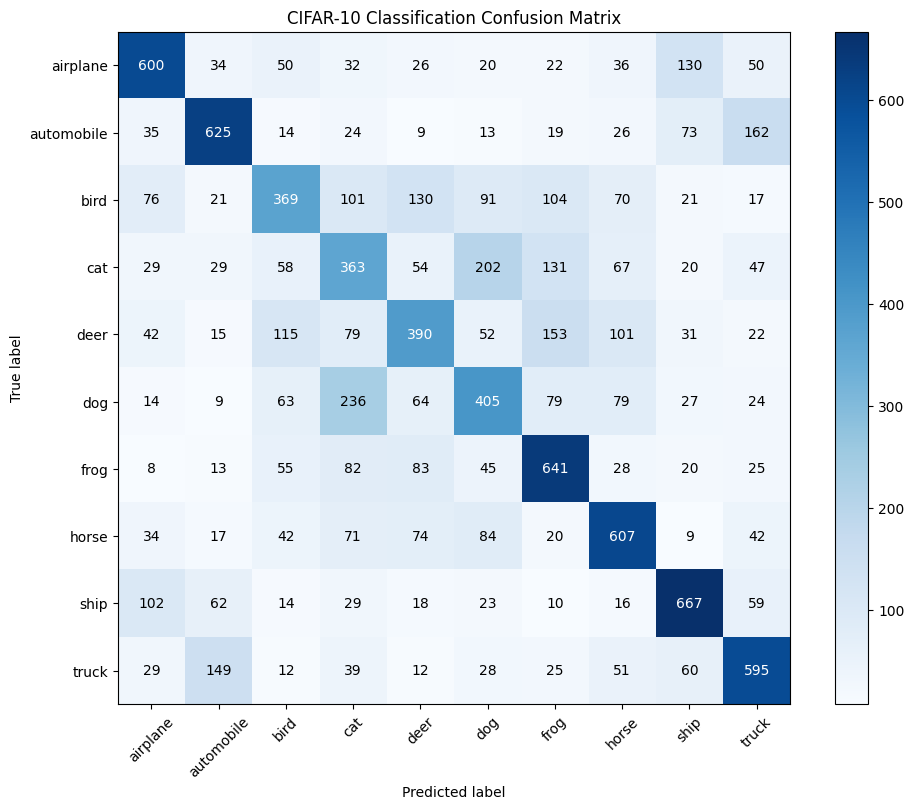

In [20]:
# Plot training history
plot_history(history)

# Get predictions
y_prediction_categorical = cp.argmax(model.forward(x_test_categorical), axis=1)

# Define CIFAR-10 class names
cifar10_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                  'dog', 'frog', 'horse', 'ship', 'truck']

# Plot confusion matrix and F1 scores
plot_confusion_matrix_and_f1(y_test_categorical, y_prediction_categorical,
                             classes=cifar10_classes,
                             title='CIFAR-10 Classification Confusion Matrix')